Implement a Naive Bayes Classifier on Survey Data. While one of the main assumptions of Naive Bayes is independence (in addition to equality), the independence assumption is assumed to be ture (even though its not as there are 'negative' questions relateing to a personality trait. Like other applications of Naive Bayes, we are going to assume that independence is true, even though it is not true in other applications aswell

# Packages

In [0]:
import pandas as pd
import numpy as np
import os

from google.colab import drive
from google.colab import files

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt 

In [0]:
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# Read in Data

In [0]:
data = pd.read_csv('/content/drive/My Drive/Data Mining Assignment/data/transformed_data_basic.csv')
data.shape

(750305, 110)

# Encode Target Variable (Country)

In [0]:
country_encoded = preprocessing.LabelEncoder().fit_transform(data['country'])
data['country_encoded'] = country_encoded
print(len(country_encoded))
print(np.unique(country_encoded, return_counts=True))

data.head()

750305
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]), array([ 43208,   5479,  53618,  12459,   5408,  57726,   5684,  13890,
         9351,   9865,   8653,   9109,  11270,  16676,   9106,   6891,
       471912]))


EXT1  EXT2  ...  long_appx_lots_of_err  country_encoded
0   1.0   2.0  ...                 0.1991                5
1   0.0  -2.0  ...               101.7060                9
2  -1.0   0.0  ...                -1.3833                5
3  -1.0   1.0  ...                -1.2500                5
4   0.0   0.0  ...                18.0500               14

[5 rows x 111 columns]

In [0]:
pca = PCA(.8)
questions = data[data.columns[range(50)]]
questions.head()
principalComponents = pca.fit_transform(questions)
principalComponents
pca.n_components_ 

26

In [0]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.16406231 0.11025857 0.0821305  0.06371139 0.05864794 0.02893356
 0.0254984  0.02195072 0.01959543 0.01895527 0.01819891 0.01734634
 0.01581765 0.01563035 0.01496809 0.01473063 0.01363538 0.01317923
 0.01277312 0.01214778 0.01185874 0.01163704 0.01135976 0.01097436
 0.01076639 0.01040322]


0.8091710788823482

# Train/Test Split

In [0]:
# 70 /30
# All Columns
col_indexes = list(range(0, 100, 1)) + list(range(102, 106, 1))
# Just Answer to Questions
col_indexes = list(range(0, 50, 1))
print(col_indexes)
print(data.columns[col_indexes])
x_data = data[data.columns[col_indexes]]
x_data = principalComponents
y_data = data['country_encoded'].values
#print(x_data.columns)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=109)

print('Train X: ', x_train.shape)
print('Train Y: ', y_train.shape)
print('Test X: ', x_test.shape)
print('Test Y: ', y_test.shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')
Train X:  (525213, 26)
Train Y:  (525213,)
Test X:  (225092, 26)
Test Y:  (225092,)


# Guassian Bayes

In [0]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

## Evaluation

In [0]:
print(y_pred)
print(y_test)

[16 16 16 ...  9 16 16]
[16  9  9 ... 15 16  5]


In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("MCC:", metrics.matthews_corrcoef(y_test, y_pred))

Accuracy: 0.6187603291098751
Recall: 0.6187603291098751
Precision: 0.4281907507069608
F1 Score: 0.4917242312762359
MCC: 0.06304763496719397


# Experiment


## Experiment with Different Number of Features Used

In [0]:
feature_exp = pd.DataFrame(columns = ['feature_count_used', 'features_used', 'accuracy', 'recall', 'precision', 'f1_score', 'mcc'],
                            index = [list(range(100))])
feature_exp.head()

In [0]:
for col in range(1, 100, 1):
  print(col)
  x_data = data[data.columns[0:col]]
  y_data = data['country_encoded'].values
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=109)
  #Create a Gaussian Classifier
  gnb = GaussianNB()
  #Train the model using the training sets
  gnb.fit(x_train, y_train)
  #Predict the response for test dataset
  y_pred = gnb.predict(x_test)
  
  feature_exp.iloc[col]['feature_count_used'] = col
  feature_exp.iloc[col]['features_used'] = ','.join(map(str, x_data.columns))
  feature_exp.iloc[col]['accuracy'] = metrics.accuracy_score(y_test, y_pred)
  feature_exp.iloc[col]['recall'] = metrics.recall_score(y_test, y_pred, average = 'weighted')
  feature_exp.iloc[col]['precision'] = metrics.precision_score(y_test, y_pred, average = 'weighted', zero_division=0)
  feature_exp.iloc[col]['f1_score'] = metrics.f1_score(y_test, y_pred, average = 'weighted', zero_division=0)
  feature_exp.iloc[col]['mcc'] = metrics.matthews_corrcoef(y_test, y_pred)



In [0]:
feature_exp.head(100)

feature_count_used  ...    f1_score
0                 NaN  ...         NaN
1                   1  ...    0.406859
2                   2  ...    0.406859
3                   3  ...    0.406859
4                   4  ...    0.406859
..                ...  ...         ...
95                 95  ...  0.00129969
96                 96  ...  0.00128615
97                 97  ...  0.00132814
98                 98  ...  0.00128709
99                 99  ...  0.00133857

[100 rows x 6 columns]

In [0]:
print(feature_exp.head(100))
feature_exp['accuracy'] == max(feature_exp['accuracy'].dropna())
#feature_exp.index(feature_exp['accuracy'] == max(feature_exp['accuracy'].dropna()))

   feature_count_used  ...    f1_score
0                 NaN  ...         NaN
1                   1  ...    0.406859
2                   2  ...    0.406859
3                   3  ...    0.406859
4                   4  ...    0.406859
..                ...  ...         ...
95                 95  ...  0.00129969
96                 96  ...  0.00128615
97                 97  ...  0.00132814
98                 98  ...  0.00128709
99                 99  ...  0.00133857

[100 rows x 6 columns]


0     False
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: accuracy, Length: 100, dtype: bool

## Experiment with Different Number of PCA Components

In [0]:
pca_exp = pd.DataFrame(columns = ['pc_count', 'pc_variance', 'accuracy', 'recall', 'precision', 'f1_score', 'mcc'],
                            index = [list(range(1,51))])
pca_exp.head()

In [0]:
for pc_count in list(range(1,51,1)):
  print(pc_count)
  pca = PCA(n_components = pc_count)
  principal_components = pca.fit_transform(data[data.columns[range(50)]])
  pca_exp.iloc[pc_count]['pc_count'] = pca.n_components
  pca_exp.iloc[pc_count]['pc_variance'] = sum(pca.explained_variance_ratio_)
  
  x_data = principal_components
  y_data = data['country_encoded'].values
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=109)
  #Create a Gaussian Classifier
  gnb = GaussianNB()
  #Train the model using the training sets
  gnb.fit(x_train, y_train)
  #Predict the response for test dataset
  y_pred = gnb.predict(x_test)
  
  pca_exp.iloc[pc_count]['accuracy'] = metrics.accuracy_score(y_test, y_pred)
  pca_exp.iloc[pc_count]['recall'] = metrics.recall_score(y_test, y_pred, average = 'weighted')
  pca_exp.iloc[pc_count]['precision'] = metrics.precision_score(y_test, y_pred, average = 'weighted', zero_division=0)
  pca_exp.iloc[pc_count]['f1_score'] = metrics.f1_score(y_test, y_pred, average = 'weighted', zero_division=0)
  pca_exp.iloc[pc_count]['mcc'] = metrics.matthews_corrcoef(y_test, y_pred)


In [0]:
pca_exp.head()

pc_count pc_variance  accuracy    recall precision  f1_score
1      NaN         NaN       NaN       NaN       NaN       NaN
2        1    0.163046  0.564073  0.564073  0.318179  0.406859
3        2    0.272498  0.564073  0.564073  0.318179  0.406859
4        3     0.35401  0.564073  0.564073  0.318179  0.406859
5        4    0.416912  0.564073  0.564073  0.318179  0.406859

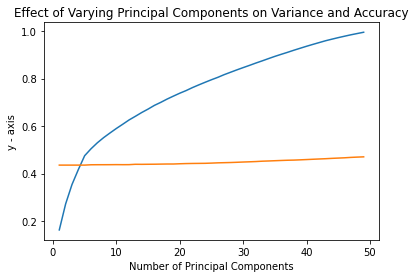

In [0]:
plt.plot(pca_exp['pc_count'], pca_exp['pc_variance']) 
plt.plot(pca_exp['pc_count'], 1- pca_exp['accuracy']) 
  
# naming the x axis 
plt.xlabel('Number of Principal Components') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Effect of Varying Principal Components on Variance and Acc') 
  
# function to show the plot 
fig.set_size_inches(20, 10)
plt.show() 